In [69]:
import numpy as np
from scipy.linalg import eig
from matplotlib import pyplot as plt

## Условие
Есть лестница с $n$ ступеньками. Если мы внизу, то идем наверх, если наверху, то равновероятно падаем куда-то вниз, иначе с равноверотяно подниаемся или опускаемся.  
Нужно найти распределение вероятностей нахождения на ступеньках через большой промежуток времени. 

## Решение
Это марковский процесс - то есть следующее состояние зависит от предыдущего, а на всю предыдущую историю нам все равно(*неформально*).  
Зададим матрицу переходов процесса согласно условию.

In [79]:
# количество ступенек
n = 6

# матрица переходов между состояниями
P = np.zeros((n,n))
for i in range(P.shape[0]-1):
    P[i+1, i] = 1/2
    P[i, i+1] = 1/2
P[0, 1] = 1
P[-1,:-1] = 1/(n-1) * np.ones(P.shape[0]-1)
P

array([[0. , 1. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0. ]])

Теперь нужно найти стационарное (или финальное) распределение вероятностей $p$.  
Оно должно удовлетворять следующему условию:  
$$pP=p$$  
Где $P$ - матрица переходов.  
>Есть теорема о том, что если из любого состояния всегда можно попасть в какое-то за какое-то количество шагов, то такое состояние существует и не зависит от начального состояния, что собственно и происходит в нашем случае.  


### Идея 1
Исходя из того, что через долгое время система стабилизируется, можно найти предельное распределение как предел произведения матрицы $P$ на себя. То есть  
$$
\lim_{n \to \infty} P^n
$$  
Не знаю, можно ли найти его аналитически, но можно решить *численно*(не знаю насколько тут применимо это слово), просто возведя матрицу в очень большую степень (либо до тех пор, пока ее значение не перестанут меняться).

In [100]:
np.linalg.matrix_power(P, 1000)

array([[0.15, 0.28, 0.24, 0.18, 0.1 , 0.05],
       [0.15, 0.28, 0.24, 0.18, 0.1 , 0.05],
       [0.15, 0.28, 0.24, 0.18, 0.1 , 0.05],
       [0.15, 0.28, 0.24, 0.18, 0.1 , 0.05],
       [0.15, 0.28, 0.24, 0.18, 0.1 , 0.05],
       [0.15, 0.28, 0.24, 0.18, 0.1 , 0.05]])

Любая строка в сумме дает единицу (это радует, распределение все таки ищем же).  
Тогда ответом будет любая строка. 

In [104]:
solution = np.linalg.matrix_power(P, 1000)[0]
print(solution)
print(f'Получается ли в сумме единица? - {np.allclose(1, solution.sum())}')

[0.15 0.28 0.24 0.18 0.1  0.05]
Получается ли в сумме единица? - True


Нарисуем получаенное распределение - интересно все таки

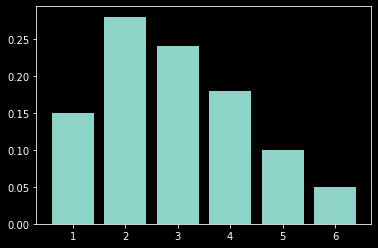

In [102]:
plt.bar([i+1 for i in range(n)], solution)
plt.show()

Как видно, скорее всего мы окажемся на второй ступеньке.

## Идея 2
Вспомним линейную алегбру и решим уравенение $pP = p$  
Оказывается, собственные векторы бывают не только правые, но и левые. В нашем случае как раз нужно найти левый собственный вектор для собственного значения $1$. Может, эту задачу тоже решить аналитически в общем виде, но я не совсем понимаю как, поэтому воспользуемся численными методами.

In [108]:
w, vl, vr = eig(P, left=True)
print('Собственные значения', w, sep='\n')

Собственные значения
[ 1.        +0.j -0.9589681 +0.j  0.61068922+0.j -0.57114143+0.j
 -0.23776109+0.j  0.1571814 +0.j]


In [118]:
solution_2 = vl[:,0]
print('левый собственный вектор для единицы:', solution_2, sep='\n')

левый собственный вектор для единицы:
[-0.33259505 -0.6208441  -0.53215208 -0.39911406 -0.22173004 -0.11086502]


Казалось бы, у этого вектора нет ничего общего с распределением, так как значения отрицательные и в сумме дают не едиинцу. Но если отнормировать его по $l_1$ - норме, то мы получим, что-то интересное.  
$$
\mathbf{v} := \frac{1}{\sum_{i=1}^{n} \mathbf{v}_i} \mathbf{v}
$$

In [125]:
solution_2 = solution_2 / solution_2.sum()
print('после нормировки:',solution_2, sep='\n')
print(f'Получается ли в сумме единица? - {np.allclose(1, solution_2.sum())}')

после нормировки:
[0.15 0.28 0.24 0.18 0.1  0.05]
Получается ли в сумме единица? - True


Получился тот же самый ответ, возможно он верный.

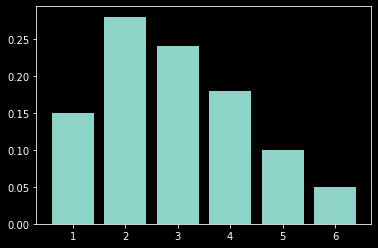

In [126]:
plt.bar([i+1 for i in range(n)], solution_2)
plt.show()